### Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

In [28]:
# Sample dataset
data = {
    'Study_Hours': [1,2,3,4,5,6,7,8,9,10],
    'Exam_Score': [50,65,75,80,85,88,89,88,85,80]
}

# Create a DF from the dataset
df = pd.DataFrame(data)

In [29]:
# Extract the features (study_hours) and target (exam_score)
fts = df[["Study_Hours"]]
trgt = df[["Exam_Score"]]

print(fts)
print(trgt)

   Study_Hours
0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
   Exam_Score
0          50
1          65
2          75
3          80
4          85
5          88
6          89
7          88
8          85
9          80


In [30]:
# Fit linear regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(fts, trgt)
y_pred_lin = lin_reg.predict(fts)

r2_lin = r2_score(trgt, y_pred_lin)
mse_lin = mean_squared_error(trgt, y_pred_lin)

# Fit polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(fts)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, trgt)
y_pred_poly = poly_reg.predict(X_poly)

r2_poly = r2_score(trgt, y_pred_poly)
mse_poly = mean_squared_error(trgt, y_pred_poly)


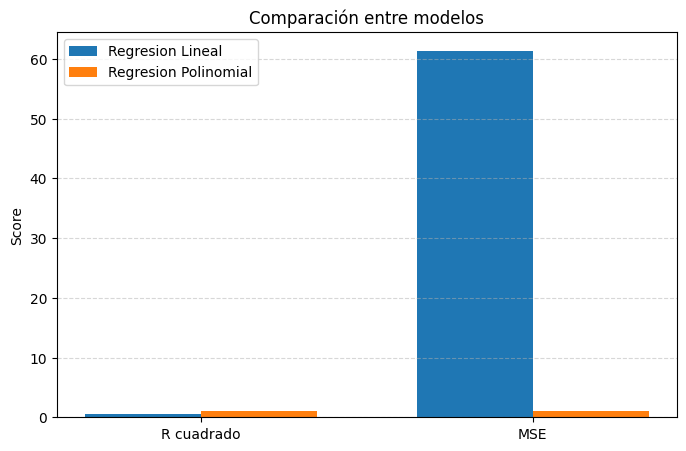

In [31]:
# Plot results
metrics = ["R cuadrado", "MSE"]
linear_scores = [r2_lin, mse_lin]
poly_scores = [r2_poly, mse_poly]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar([i - width/2 for i in x], linear_scores, width, label="Regresion Lineal")
plt.bar([i + width/2 for i in x], poly_scores, width, label="Regresion Polinomial")

# Evaluate the models
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Comparación entre modelos")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

### Exponential Regression

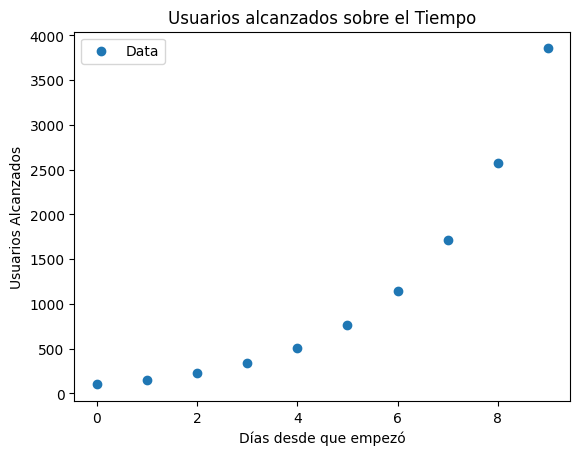

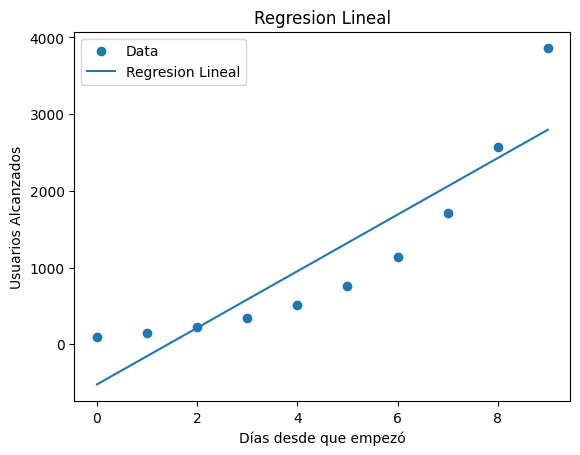

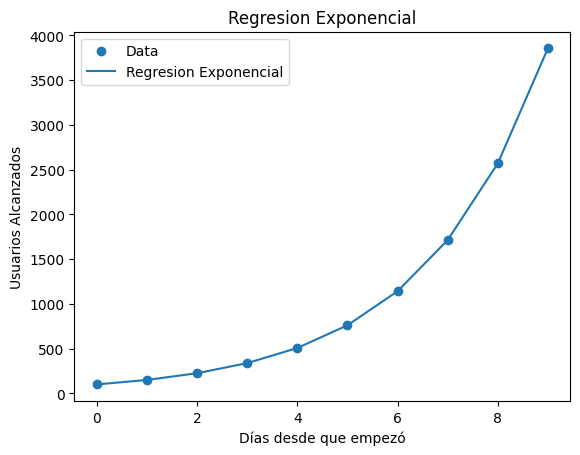

----- Regresion Lineal -----
R cuadrado: 0.811021837748588
MSE: 261371.25333333333

----- Regresion Exponencial -----
R cuadrado: 0.9999999626766993
MSE: 0.05162097971299458


In [16]:
# Sample dataset
data2 = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100,150,225,338,507,761,1142,1713,2570,3855]
}

# Create a DataFrame from the dataset
df2 = pd.DataFrame(data2)

# Extract the features (Date) and target (Engaged_Users)
df2["Days"] = (df2["Date"] - df2["Date"].min()).dt.days.astype(float) # Hacemos la conversión de fechas a números para que sea capaz de utilizarse en el modelo, ya que los modelos de regresión no entienden directamente las fechas
features = df2[["Days"]].values
target = df2["Engaged_Users"].values  

# Visualize the data
plt.scatter(df2["Days"], df2["Engaged_Users"], label="Data")
plt.title("Usuarios alcanzados sobre el Tiempo")
plt.xlabel("Días desde que empezó")
plt.ylabel("Usuarios Alcanzados")
plt.legend()
plt.show()

# Fit linear regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(features, target)
y_pred_lin = lin_reg.predict(features)

plt.scatter(df2["Days"], df2["Engaged_Users"], label="Data")
plt.plot(df2["Days"], y_pred_lin, label="Regresion Lineal")
plt.title("Regresion Lineal")
plt.xlabel("Días desde que empezó")
plt.ylabel("Usuarios Alcanzados")
plt.legend()
plt.show()

# Fit exponential regression
def exponential(x, a, b):
    return a * np.exp(b * x)

# curve_fit espera 1D np.array
params, _ = curve_fit(exponential, df2["Days"].values, df2["Engaged_Users"].values, p0=(1, 0.1))
y_pred_exp = exponential(df2["Days"].values, params[0], params[1])

plt.scatter(df2["Days"], df2["Engaged_Users"], label="Data")
plt.plot(df2["Days"], y_pred_exp, label="Regresion Exponencial")
plt.title("Regresion Exponencial")
plt.xlabel("Días desde que empezó")
plt.ylabel("Usuarios Alcanzados")
plt.legend()
plt.show()

# Evaluate the models
print("----- Regresion Lineal -----")
print("R cuadrado:", r2_score(target, y_pred_lin))
print("MSE:", mean_squared_error(target, y_pred_lin))

print("\n----- Regresion Exponencial -----")
print("R cuadrado:", r2_score(target, y_pred_exp))
print("MSE:", mean_squared_error(target, y_pred_exp))

### Power models

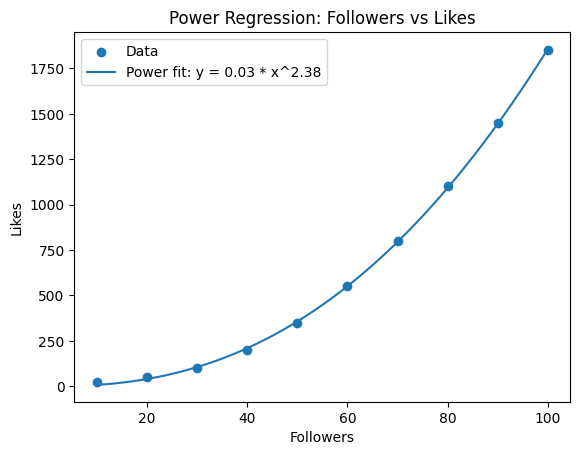

In [17]:
# Create a DataFrame with the sample data
data3 = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25,50,100,200,350,550,800,1100,1450,1850],
    'Shares': [5,10,20,40,70,110,160,220,290,370],
    'Comments': [2,4,8,16,28,44,64,88,116,148]
}

df3 = pd.DataFrame(data3)

# Perform power regression for Likes as an example
from scipy.optimize import curve_fit
def power_func(x, a, b):
    return a * (x ** b)

_x = df3["Followers"].values.astype(float)
_y = df3["Likes"].values.astype(float)
_popt, _pcov = curve_fit(power_func, _x, _y, p0=(1.0, 1.0), bounds=([0.0, -np.inf], [np.inf, np.inf]))
a_hat, b_hat = _popt

# Generate a range of Followers values for the fitted curve
x_fit = np.linspace(_x.min(), _x.max(), 200)

# Calculate the predicted Likes using the fitted parameters
y_fit = power_func(x_fit, a_hat, b_hat)

# Create a plot to visualize the relationship
import matplotlib.pyplot as plt
plt.scatter(df3["Followers"], df3["Likes"], label="Data")
plt.plot(x_fit, y_fit, label=f"Power fit: y = {a_hat:.2f} * x^{b_hat:.2f}")
plt.title("Power Regression: Followers vs Likes")
plt.xlabel("Followers")
plt.ylabel("Likes")
plt.legend()
plt.show()
